In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn import linear_model, datasets

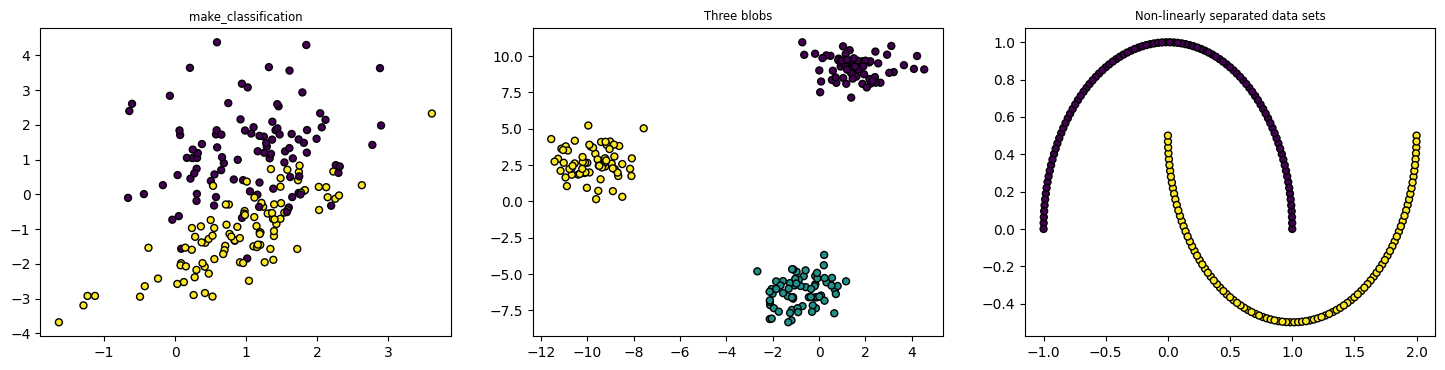

In [60]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
plt.title("make_classification", fontsize='small')
X1, Y1 = make_classification(n_samples=200, n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=25, edgecolor='k')

plt.subplot(1,3,2)
plt.title("Three blobs", fontsize='small')
X2, Y2 = make_blobs(n_samples=200, n_features=2, centers=3)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, s=25, edgecolor='k')

plt.subplot(1,3,3)
plt.title("Non-linearly separated data sets", fontsize='small')
X3, Y3 = make_moons(n_samples=200, shuffle=True, noise=None, random_state=None)
plt.scatter(X3[:, 0], X3[:, 1], marker='o', c=Y3, s=25, edgecolor='k')

plt.show()

In [3]:
def draw_boundry(X, Y, logreg):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    h = 0.02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)
    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

# 1. Logistic Regression

Accuracy 0.885
Accuracy 1.0


<ipython-input-3-313e50aedcd0>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
<ipython-input-3-313e50aedcd0>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


Accuracy 0.88


<ipython-input-3-313e50aedcd0>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


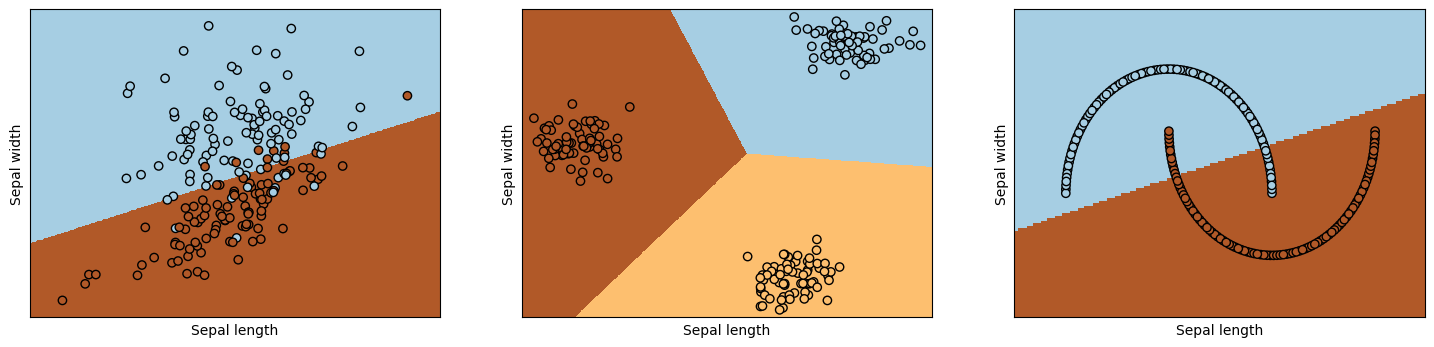

In [92]:
logreg = linear_model.LogisticRegression()

plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
logreg.fit(X1, Y1)
print(f'Accuracy {logreg.score(X1, Y1)}')
draw_boundry(X1, Y1, logreg)

plt.subplot(1,3,2)
logreg.fit(X2, Y2)
print(f'Accuracy {logreg.score(X2, Y2)}')
draw_boundry(X2, Y2, logreg)

plt.subplot(1,3,3)
logreg.fit(X3, Y3)
print(f'Accuracy {logreg.score(X3, Y3)}')
draw_boundry(X3, Y3, logreg)

plt.show()

Logistic regression can well separate linear separable dataset like make_classification and three bomb, while for moon, it performes worse than other datasets.

# 2. KFold Cross Validation 

In [5]:
from sklearn.model_selection import KFold

In [140]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)
logreg = linear_model.LogisticRegression()

In [141]:
def run_kf(kf, X, y, model):
    acc = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        acc.append(model.score(X_test, y_test))
    print(f'Mean Acc: {np.array(acc).mean()}')

In [142]:
run_kf(kf, X1, Y1, logreg)
run_kf(kf, X2, Y2, logreg)
run_kf(kf, X3, Y3, logreg)

Mean Acc: 0.8600000000000001
Mean Acc: 1.0
Mean Acc: 0.8699999999999999


Cross validationcan give a better estimation of model on dataset by making the evaluation process less biased.

# 3. Logistic Regression from scratch

In [16]:
def log_likelihood(features, target, weights):
    scores = np.dot(features, weights)
    ll = np.sum( target*scores - np.log(1 + np.exp(scores)) )
    return ll

In [136]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))


class LogisticRegression():
    def __init__(self, num_steps, learning_rate, add_intercept = True):
        self.num_steps = num_steps
        self.learning_rate = learning_rate
        self.add_intercept = add_intercept
        
    def fit(self, features, target, verb=False):
        if self.add_intercept:
            intercept = np.ones((features.shape[0], 1))
            features = np.hstack((intercept, features))

        # initialisation of weights
        weights = np.zeros(features.shape[1])

        for step in range(self.num_steps):
            scores = np.dot(features, weights)
            predictions = sigmoid(scores)

            # Update weights with gradient and hessian matrix
            output_error_signal = target - predictions
            gradient = -np.dot(features.T, output_error_signal)
            hess = features.T @ (features * predictions[:, None] * (1 - predictions[:, None]))

            weights -= self.learning_rate * np.linalg.inv(hess) @ gradient

            # Print log-likelihood every so often
            if step % 1000 == 0 and verb:
                print(log_likelihood(features, target, weights))
        self.weights = weights
        
    def predict(self, X):
        if self.add_intercept:
            intercept = np.ones((X.shape[0], 1))
            X = np.hstack((intercept, X))
        scores = np.dot(X, self.weights)
        predictions = sigmoid(scores)
        return np.round(predictions)
    
    def score(self, X, y):
        pred = self.predict(X)
        score = np.sum(pred == y)/len(y)
        return score
        
class LogisticRegressionMulticlass():
    """Muti-class logistic regression with one vs all strategy"""
    def __init__(self, num_steps, learning_rate, add_intercept = True):
        self.num_steps = num_steps
        self.learning_rate = learning_rate
        self.add_intercept = add_intercept
        self._class_number = None
        self._classifier = []
        
    def fit(self, X, y):
        self._classifier = []
        self._class_number = len(np.unique(y))
        if self._class_number > 2:
            for i in range(self._class_number):
                cls = LogisticRegression(self.num_steps, self.learning_rate, self.add_intercept)
                mask = (y != i) * 1
                cls.fit(X, mask)
                self._classifier.append(cls)
        else:
            self._classifier = LogisticRegression(self.num_steps, self.learning_rate, self.add_intercept)
            self._classifier.fit(X, y)
        
    def predict(self, X):
        if self._class_number > 2:
            all_score = np.zeros((self._class_number, X.shape[0]))    # n_class, n_sample
            for i in range(self._class_number):
                all_score[i, :] = self._classifier[i].predict(X)
            predictions = np.argmin(all_score, axis=0)
            return predictions
        else:
            return self._classifier.predict(X)
    def score(self, X, y):
        pred = self.predict(X)
        score = np.sum(pred == y)/len(y)
        return score

## 3.1 Experiments

Accuracy 0.88


<ipython-input-3-313e50aedcd0>:13: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


Accuracy 1.0
Accuracy 0.89


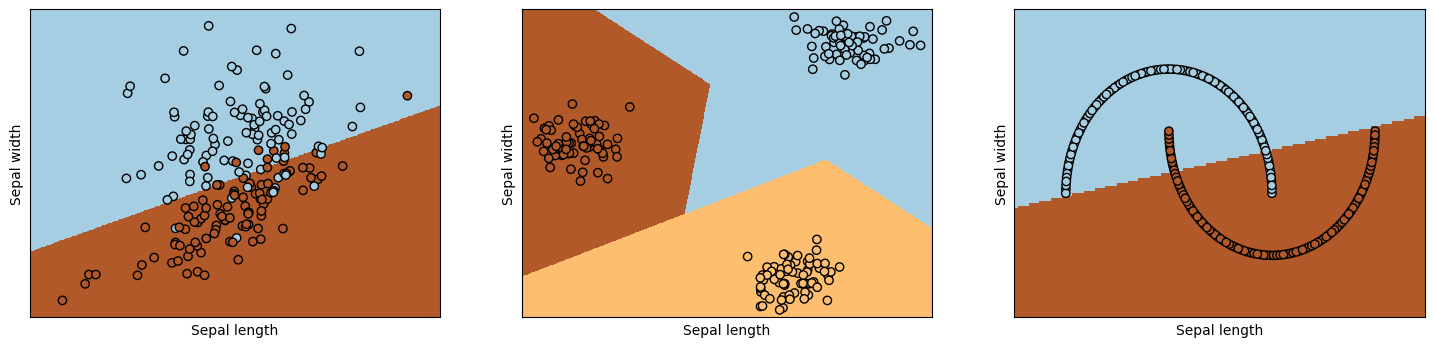

In [138]:
logreg = LogisticRegressionMulticlass(num_steps=10000, learning_rate=0.001)

plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
logreg.fit(X1, Y1)
print(f'Accuracy {logreg.score(X1, Y1)}')
draw_boundry(X1, Y1, logreg)

plt.subplot(1,3,2)
logreg.fit(X2, Y2)
print(f'Accuracy {logreg.score(X2, Y2)}')
draw_boundry(X2, Y2, logreg)

plt.subplot(1,3,3)
logreg.fit(X3, Y3)
print(f'Accuracy {logreg.score(X3, Y3)}')
draw_boundry(X3, Y3, logreg)

plt.show()

## 5-fold cross validation

In [139]:
run_kf(kf, X1, Y1, logreg)
run_kf(kf, X2, Y2, logreg)
run_kf(kf, X3, Y3, logreg)

Mean Acc: 0.865
Mean Acc: 1.0
Mean Acc: 0.8800000000000001


## Conclusion

I found that the multi-class logistic regression which I implemented with one-vs-all has even better accuracy for the last dataset.
I didn't take class weights into consideration as these samples are quite balance.
My implementation has quite good results!!!!

# 4. Mice and Breast cancer dataset

In [173]:
# Golub dataset
X_golub = pd.read_csv('data/Golub_X',sep=' ', header=None).to_numpy() # Observations
y_golub = pd.read_csv('data/Golub_y',sep=' ', header=None).to_numpy()  # Classes
y_golub = np.squeeze(y_golub, axis=1)

# Breast Cancer dataset
data_breast_cancer = pd.read_table('data/BreastDiagnostic.txt',sep=',',header=None)
breast_cancer_X = data_breast_cancer.iloc[:, 2:].to_numpy()
breast_cancer_y = (data_breast_cancer.iloc[:, 1].to_numpy() == 'M')*1

## 4.1 logistic regression from sklean

In [174]:
X_golub.shape

(72, 3562)

In [175]:
np.unique(y_golub)

array([0, 1])

In [176]:
breast_cancer_X.shape

(569, 30)

In [177]:
np.unique(breast_cancer_y)

array([0, 1])

In [178]:
kf = KFold(n_splits=5, shuffle=True, random_state=1)

In [179]:
logreg = linear_model.LogisticRegression(max_iter=1000)
run_kf(kf, X_golub, y_golub, logreg)

Mean Acc: 0.9466666666666667


In [180]:
logreg = linear_model.LogisticRegression(max_iter=2000)
run_kf(kf, breast_cancer_X, breast_cancer_y, logreg)

/home/yunfei/anaconda3/envs/AMAL/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean Acc: 0.950815090824406


/home/yunfei/anaconda3/envs/AMAL/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


I found that with breast cancer dataset, as dimension is relatively small, it is hard to make the solver converge as it is hard to find a linear separable plan for dataset.

## 4.1 My implementation of logistic regression 

In [181]:
logreg = LogisticRegressionMulticlass(num_steps=50, learning_rate=0.001)
run_kf(kf, X_golub, y_golub, logreg)

<ipython-input-136-da991e268380>:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-scores))


LinAlgError: Singular matrix

In [182]:
logreg = LogisticRegressionMulticlass(num_steps=100, learning_rate=0.001)
run_kf(kf, breast_cancer_X, breast_cancer_y, logreg)

Mean Acc: 0.956078248719143


## Conclusion
It seems that when data features dimension is relatively big compare to sample number, it is harder to calculate the inverse of hessian matrix and Newton-Raphson failed by getting a Singular matrix and the optimisation process on mice gene datset failed due to this problem. I may try to reduce feature dimensions or change optimiser.